In [1]:
import pulp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

def my_models(model, X_train, Y_train, X_test, Y_test):
    my_model = model.fit(X_train, Y_train)
    
    print(my_model.feature_importances_)
    print(my_model.score(X_train, Y_train))
    
    model_prediction = my_model.predict(X_test)
    acc = metrics.accuracy_score(model_prediction, Y_test)
    
    return acc, my_model

/usr/local/lib/python3.5/dist-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
train = pd.DataFrame.from_csv('valid.csv')

train


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,54,management,married,tertiary,no,184,no,no,cellular,6,feb,13,6,-1,0,unknown,no
1,46,management,married,unknown,no,802,yes,no,telephone,25,jul,417,1,-1,0,unknown,no
2,32,services,single,secondary,no,-198,yes,no,unknown,21,may,681,3,-1,0,unknown,yes
3,45,blue-collar,divorced,secondary,no,-184,yes,no,cellular,7,may,878,3,170,5,failure,yes
4,45,admin.,married,secondary,no,205,no,no,cellular,3,feb,373,1,92,1,success,yes
5,57,management,divorced,tertiary,no,6468,yes,no,cellular,4,sep,730,1,157,4,failure,yes
6,58,services,married,secondary,no,688,no,no,cellular,6,aug,152,2,-1,0,unknown,no
7,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
8,59,unemployed,married,secondary,no,957,no,no,cellular,8,mar,301,1,89,2,success,yes
9,37,management,single,secondary,no,655,no,yes,cellular,4,feb,258,6,-1,0,unknown,no


In [3]:
df = pd.read_csv('valid.csv')

In [4]:
df.tail()


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2004,2004,43,management,single,tertiary,no,2067,yes,no,unknown,8,may,756,1,-1,0,unknown,yes
2005,2005,44,admin.,divorced,secondary,no,0,no,no,cellular,14,apr,1594,1,148,1,failure,yes
2006,2006,59,retired,married,secondary,no,1723,no,no,unknown,19,jun,70,1,-1,0,unknown,no
2007,2007,32,blue-collar,married,secondary,no,-32,yes,no,cellular,12,may,145,1,-1,0,unknown,no
2008,2008,34,technician,married,secondary,no,0,yes,no,cellular,5,aug,231,2,2,3,success,yes


<Figure size 432x288 with 0 Axes>

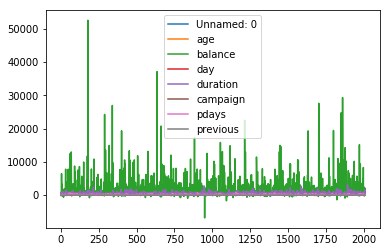

In [5]:
%matplotlib inline
plt.figure(); df.plot()

In [8]:
wszystkie=np.array(train)
x=wszystkie[:,:-1]
y=wszystkie[:,-1]


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


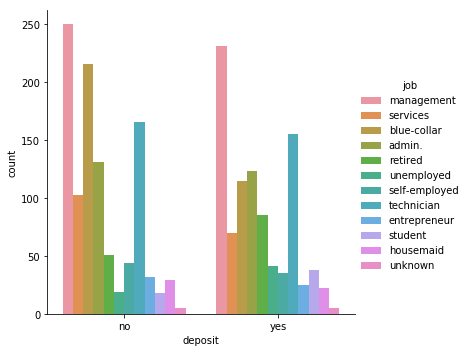

In [9]:
sns.factorplot('deposit', data=train,hue='job',kind='count')

In [10]:
prace = pd.read_csv("valid.csv", index_col=2)
prace.head() 

,Unnamed: 0,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
job,,,,,,,,,,,,,,,,,
management,0,54,married,tertiary,no,184,no,no,cellular,6,feb,13,6,-1,0,unknown,no
management,1,46,married,unknown,no,802,yes,no,telephone,25,jul,417,1,-1,0,unknown,no
services,2,32,single,secondary,no,-198,yes,no,unknown,21,may,681,3,-1,0,unknown,yes
blue-collar,3,45,divorced,secondary,no,-184,yes,no,cellular,7,may,878,3,170,5,failure,yes
admin.,4,45,married,secondary,no,205,no,no,cellular,3,feb,373,1,92,1,success,yes


In [11]:
cat_columns = ['marital','poutcome','loan','job','education'] ##,'education'
train_processed = pd.get_dummies(df, prefix_sep="_", columns=cat_columns)

In [12]:
train_processed

,Unnamed: 0,age,default,balance,housing,contact,day,month,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,0,54,no,184,no,cellular,6,feb,13,6,...,0,0,0,0,0,0,0,0,1,0
1,1,46,no,802,yes,telephone,25,jul,417,1,...,0,0,0,0,0,0,0,0,0,1
2,2,32,no,-198,yes,unknown,21,may,681,3,...,0,1,0,0,0,0,0,1,0,0
3,3,45,no,-184,yes,cellular,7,may,878,3,...,0,0,0,0,0,0,0,1,0,0
4,4,45,no,205,no,cellular,3,feb,373,1,...,0,0,0,0,0,0,0,1,0,0
5,5,57,no,6468,yes,cellular,4,sep,730,1,...,0,0,0,0,0,0,0,0,1,0
6,6,58,no,688,no,cellular,6,aug,152,2,...,0,1,0,0,0,0,0,1,0,0
7,7,75,no,3324,no,cellular,2,feb,149,1,...,0,0,0,0,0,0,1,0,0,0
8,8,59,no,957,no,cellular,8,mar,301,1,...,0,0,0,0,1,0,0,1,0,0
9,9,37,no,655,no,cellular,4,feb,258,6,...,0,0,0,0,0,0,0,1,0,0


In [13]:
def my_models(model, X_train, Y_train, X_test, Y_test):
    my_model = model.fit(X_train, Y_train)
    
    print(my_model.feature_importances_)
    print(my_model.score(X_train, Y_train))
    
    model_prediction = my_model.predict(X_test)
    acc = metrics.accuracy_score(model_prediction, Y_test)
    
    return acc, my_model

In [14]:

final_features = ["marital_divorced", "marital_married", "marital_single", "loan_no","loan_yes","poutcome_unknown","poutcome_success",
                 "poutcome_other","poutcome_failure","education_unknown","education_tertiary","education_secondary","education_primary",
                 "job_entrepreneur","job_housemaid","job_management","job_retired","job_services","job_student","job_technician","job_unemployed"
                 ,"job_self-employed","job_unknown","job_blue-collar","job_admin.","age"]
final_data = train_processed[["deposit"] + final_features]
training, testing = train_test_split(final_data, test_size = 0.3, random_state = 0, stratify = final_data["deposit"])
X_train = training[training.columns[1:]]
Y_train = training[training.columns[:1]]
X_test = testing[testing.columns[1:]]
Y_test = testing[testing.columns[:1]]

In [16]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 7, min_samples_leaf = 10, random_state = 0)
forest_model = RandomForestClassifier(max_depth = 8, max_leaf_nodes = 9, n_estimators = 300, random_state = 0)
gradboost_model = GradientBoostingClassifier(learning_rate =  0.01, max_depth = 7,
                                             max_features = 1.0, n_estimators = 200, subsample = 1.0, random_state = 0)

tree_acc, my_tree = my_models(tree_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Decision Tree is", tree_acc)

forest_acc, my_forest = my_models(forest_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Random Forest is", forest_acc)

gradboost_acc, my_gradboost = my_models(gradboost_model, X_train, Y_train, X_test, Y_test)    
print("The accuracy of Gradient Boosting is", gradboost_acc)

final_test = train_processed[final_features]

tree_prediction = my_tree.predict(final_test)
forest_prediction = my_forest.predict(final_test)
gradboost_prediction = my_gradboost.predict(final_test)

test_cp1 = train_processed[:]
test_cp2 = train_processed[:]
test_cp3 = train_processed[:]

headers = ["job", "deposit"]

test_cp1["deposit"] = tree_prediction
tree_prediction = pd.DataFrame(test_cp1, columns = headers)
tree_prediction.to_csv("tree_prediction.csv", index = False)

test_cp2["deposit"] = forest_prediction
forest_prediction = pd.DataFrame(test_cp2, columns = headers)
forest_prediction.to_csv("forest_prediction.csv", index = False)

test_cp3["deposit"] = gradboost_prediction
gradboost_prediction = pd.DataFrame(test_cp3, columns = headers)
gradboost_prediction.to_csv("gradboost_prediction.csv", index = False)

[ 0.          0.          0.          0.0827411   0.          0.05925132
  0.51775748  0.          0.          0.          0.05663153  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.28361856]
0.645803698435
The accuracy of Decision Tree is 0.65671641791


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[ 0.0042674   0.01756087  0.01955979  0.05913793  0.05890887  0.15385341
  0.2707341   0.00695341  0.02199568  0.00278914  0.03005554  0.01184452
  0.01360817  0.00580546  0.00211301  0.005566    0.01626504  0.01557961
  0.00373194  0.00561628  0.01346492  0.00466971  0.00098586  0.03611223
  0.0049642   0.21385692]
0.659317211949
The accuracy of Random Forest is 0.643449419569


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.02316393  0.02813827  0.02546462  0.0278634   0.01913444  0.03100552
  0.21973579  0.01063737  0.0069053   0.00285252  0.04906335  0.02311399
  0.01634421  0.02135146  0.01317492  0.00654394  0.00740466  0.00890622
  0.00647284  0.01816437  0.01919743  0.01881589  0.00102344  0.01482391
  0.01169132  0.36900688]
0.746088193457
The accuracy of Gradient Boosting is 0.640132669983
